## 기본모델과 Affinity Propagation 모델 비교

### 결론
- Affinity Propagation
    - kmeans와 다르게 클러스터의 개수 k를 지정할 필요가 없음.

- preference 변경하면서 최적 찾아내야 함
    - -10 일때 가장 성능 좋음 (샘플데이터기준)
    - 하지만 k-means 보다 성능 안좋음.

- 실루엣 스코어
    - k-means : 0.647
    - affinity propagation : 0.564


In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
tmp_df = pd.read_csv('tmp_data.csv', index_col=0)
tmp_df.head()

,A,B,C,D
사직동,0.756808,0.837151,0.367741,0.856218
삼청동,0.827742,0.304679,0.923518,0.000679
부암동,0.568917,0.924518,0.056251,0.260088
평창동,0.580705,0.584580,0.844815,0.060866
무악동,0.139818,0.303443,0.598331,0.312935


In [3]:
tmp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426 entries, 사직동 to 상일2동
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       426 non-null    float64
 1   B       426 non-null    float64
 2   C       426 non-null    float64
 3   D       426 non-null    float64
dtypes: float64(4)
memory usage: 16.6+ KB


In [4]:
data = tmp_df
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(data)

KMeans(n_clusters=10, random_state=0)

In [5]:
print(kmeans.labels_)

[9 3 0 8 4 2 0 2 5 9 4 9 1 9 2 0 0 8 0 0 3 0 3 3 6 8 8 5 9 8 1 8 0 9 4 5 1
 9 2 8 3 8 8 5 3 5 6 9 8 7 3 2 1 3 7 0 9 0 7 8 9 3 3 7 5 0 8 9 1 7 9 5 9 2
 7 6 0 2 8 0 7 6 7 6 4 9 7 1 4 8 7 3 7 6 5 4 8 7 3 2 3 2 5 6 3 3 6 1 2 6 9
 5 0 9 6 7 1 9 7 5 9 8 8 3 1 8 2 7 5 2 1 0 4 6 4 0 5 1 0 2 8 6 9 8 8 2 3 8
 2 3 8 9 9 1 4 0 0 8 4 0 6 3 6 8 0 1 1 7 5 3 3 2 1 7 3 4 9 5 2 6 3 9 8 5 7
 2 4 7 4 0 5 0 5 2 1 8 7 2 2 6 1 8 6 2 1 0 0 8 4 7 5 3 8 0 4 3 7 4 7 6 7 3
 3 1 3 1 2 5 7 4 3 8 8 2 8 3 9 8 2 6 9 7 6 3 6 7 8 6 3 5 4 6 0 2 8 7 0 0 7
 6 5 2 1 3 6 8 2 6 2 9 8 7 7 8 6 1 4 3 3 3 2 8 4 9 3 1 6 1 6 6 1 2 7 5 8 4
 6 5 1 1 2 5 2 2 2 9 8 4 9 0 2 5 5 5 8 9 0 0 7 6 8 2 0 4 1 6 4 9 4 1 5 0 2
 5 7 1 5 8 6 5 7 7 2 1 0 9 0 9 9 3 2 4 5 5 8 1 4 8 4 1 8 8 9 7 8 8 3 0 0 6
 4 1 0 5 6 7 0 8 7 0 6 9 5 6 2 9 4 2 1 2 9 4 5 8 8 7 3 8 7 3 1 2 1 6 4 4 5
 8 6 3 9 3 9 6 7 0 9 4 2 6 9 0 1 1 8 0]


In [6]:
tmp_df['km_cluster'] = kmeans.labels_

In [7]:
tmp_df.groupby('km_cluster').count()

,A,B,C,D
km_cluster,,,,
0,44,44,44,44
1,39,39,39,39
2,45,45,45,45
3,43,43,43,43
4,34,34,34,34
5,38,38,38,38
6,42,42,42,42
7,42,42,42,42
8,57,57,57,57


In [8]:
from sklearn.metrics import silhouette_score, silhouette_samples
score_samples = silhouette_samples(data, tmp_df['km_cluster'])
tmp_df['silhouette_coeff']=score_samples

print()

average_score = silhouette_score(data, tmp_df['km_cluster'])
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))


Silhouette Analysis Score:0.647


In [9]:
tmp_df.groupby('km_cluster')['silhouette_coeff'].mean()

km_cluster
0    0.684073
1    0.643383
2    0.634306
3    0.669386
4    0.645854
5    0.653858
6    0.624971
7    0.638834
8    0.643703
9    0.665328
Name: silhouette_coeff, dtype: float64

#### Affinity Propagation

In [19]:
tmp_df = pd.read_csv('tmp_data.csv', index_col=0)
tmp_df.head()

,A,B,C,D
사직동,0.756808,0.837151,0.367741,0.856218
삼청동,0.827742,0.304679,0.923518,0.000679
부암동,0.568917,0.924518,0.056251,0.260088
평창동,0.580705,0.584580,0.844815,0.060866
무악동,0.139818,0.303443,0.598331,0.312935


In [29]:
data = tmp_df.values.tolist()

In [30]:
from sklearn.cluster import AffinityPropagation
aff = AffinityPropagation(preference=-10, random_state=0).fit(data)

In [31]:
aff.labels_

array([5, 4, 1, 4, 1, 2, 1, 0, 4, 5, 2, 3, 5, 5, 2, 5, 1, 1, 1, 1, 4, 1,
       4, 4, 3, 4, 4, 1, 3, 4, 5, 4, 1, 3, 4, 1, 2, 3, 2, 3, 4, 4, 4, 0,
       4, 0, 3, 3, 4, 2, 4, 0, 2, 4, 2, 1, 3, 1, 2, 1, 0, 4, 2, 2, 0, 1,
       4, 5, 5, 3, 5, 0, 3, 1, 2, 1, 1, 2, 1, 1, 2, 3, 2, 3, 1, 5, 2, 4,
       1, 4, 2, 4, 2, 3, 0, 1, 4, 2, 4, 0, 4, 3, 0, 3, 4, 4, 3, 5, 0, 1,
       3, 0, 1, 5, 3, 2, 4, 3, 2, 0, 5, 4, 4, 4, 5, 5, 0, 2, 0, 0, 5, 1,
       2, 3, 1, 1, 1, 5, 1, 0, 4, 3, 5, 4, 4, 0, 4, 4, 0, 4, 4, 5, 5, 4,
       1, 1, 1, 4, 1, 1, 3, 0, 3, 4, 1, 5, 2, 2, 0, 4, 4, 0, 5, 2, 4, 2,
       3, 1, 0, 3, 0, 5, 5, 0, 2, 0, 4, 2, 2, 1, 4, 1, 1, 0, 2, 4, 2, 5,
       5, 3, 4, 4, 3, 2, 2, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 2, 4, 2, 3,
       2, 4, 4, 3, 2, 5, 0, 1, 1, 2, 4, 4, 4, 0, 1, 4, 3, 1, 3, 3, 5, 2,
       3, 4, 3, 2, 4, 1, 4, 1, 1, 3, 5, 0, 1, 2, 1, 1, 2, 1, 1, 0, 5, 4,
       3, 1, 0, 5, 0, 5, 4, 2, 2, 4, 3, 3, 2, 4, 0, 0, 0, 4, 2, 5, 4, 5,
       1, 2, 3, 1, 3, 2, 2, 2, 4, 4, 3, 0, 4, 2, 0,

In [32]:
tmp_df['aff_cluster'] = aff.labels_

In [33]:
tmp_df.groupby('aff_cluster').count()

,A,B,C,D,aff_silhouette_coeff
aff_cluster,,,,,
0,58,58,58,58,58
1,92,92,92,92,92
2,73,73,73,73,73
3,55,55,55,55,55
4,93,93,93,93,93
5,55,55,55,55,55


In [34]:
score_samples = silhouette_samples(data, tmp_df['aff_cluster'])
tmp_df['aff_silhouette_coeff']=score_samples

print()

average_score = silhouette_score(data, tmp_df['aff_cluster'])
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))


Silhouette Analysis Score:0.474


In [35]:
tmp_df.groupby('aff_cluster')['aff_silhouette_coeff'].mean()

aff_cluster
0    0.598322
1    0.559284
2    0.550072
3    0.153224
4    0.572561
5    0.251582
Name: aff_silhouette_coeff, dtype: float64

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(tmp_df)
# pca_transformed

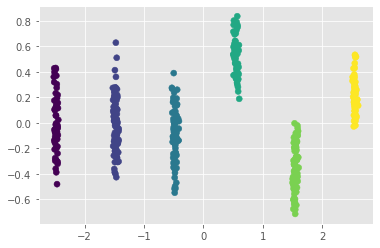

In [37]:
plt.scatter(pca_transformed[:,0], pca_transformed[:,1],c=tmp_df['aff_cluster'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("

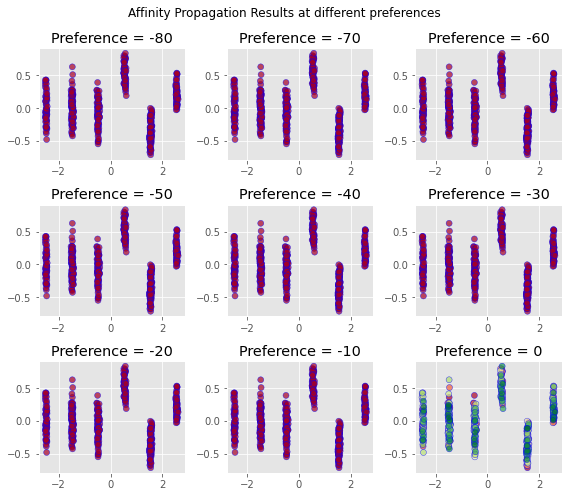

In [38]:
plt.style.use('ggplot')

from sklearn.cluster import AffinityPropagation
af_results = []

for pref in range(-80, 1, 10):
    af_results.append(AffinityPropagation(preference=pref, random_state=0).fit(pca_transformed))
    
fig, axs = plt.subplots(3, 3, figsize=(8, 7))
axs = axs.flatten()

for i, pref in enumerate(range(-80, 1, 10)):
    af_clustering = af_results[i]
    ax = axs[i]
    ax.scatter(pca_transformed[:,0], pca_transformed[:,1], c=af_clustering.labels_, alpha=0.7, edgecolors='b', cmap=plt.cm.RdYlGn)
    ax.set_title('Preference = {}'.format(pref))
    
plt.suptitle('Affinity Propagation Results at different preferences')

plt.tight_layout()